<a href="https://colab.research.google.com/github/kaveku/DeepLearning/blob/main/1_Pytorch_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
print(torch.__version__)

1.10.0+cu111


In [ ]:
x1 = torch.randn(5, 8)

In [ ]:
x1

tensor([[ 0.3162,  0.2622, -0.7522, -0.5777, -1.0925,  1.6831,  0.7397, -0.6972],
        [-0.9419,  0.0564, -1.1434,  0.0647, -0.0172, -1.5056, -1.2669,  1.5757],
        [-0.4517,  1.7563, -0.9223,  1.4520, -0.9161, -0.1169, -1.1624,  0.3025],
        [-0.8753,  0.3419,  1.4494, -0.3120,  1.0093,  0.6013, -1.6120,  0.2916],
        [ 0.2395,  0.4529, -0.1230,  0.8228,  2.0080, -1.5247,  2.1924, -0.4079]])

In [ ]:
import torch.nn as nn

In [ ]:
batch_size = 4
in_feutures = 6
out_feutures = 3

In [ ]:
model = nn.Linear(in_feutures, out_feutures, bias = True)
weight = model.weight.data
bias = model.bias.data

x = torch.rand(batch_size, in_feutures)
y = model(x)
print(y.size())

y_hand = x.mm(weight.T) + bias

torch.allclose(y, y_hand)

torch.Size([4, 3])


True

In [ ]:
#Defining a very simple neural network
#1. Creating the model, using the MNST Dataset
from torch.nn.modules.linear import Linear
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 500),
    nn.ReLU(),
    nn.Linear(500, 250),
    nn.ReLU(),
    nn.Linear(250, 10)
)

In [ ]:
#importing datasets and importing ToTensor so to use it to get the training data and testing data from the MNIST dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



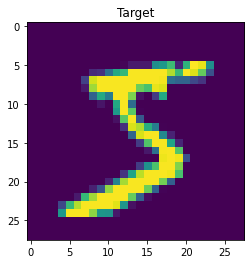

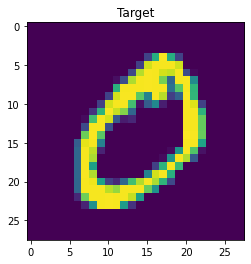

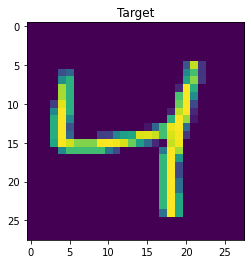

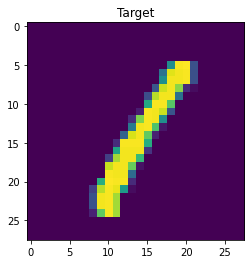

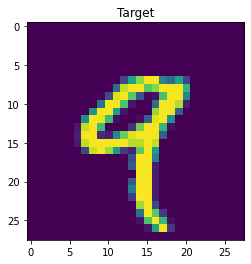

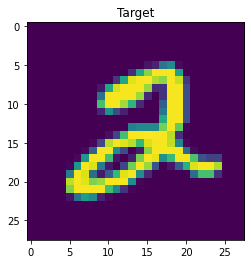

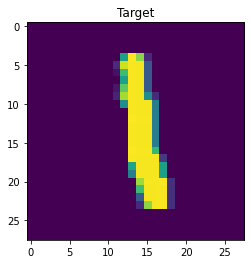

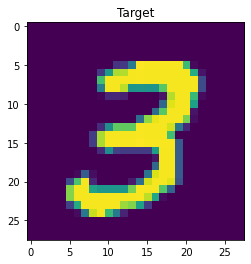

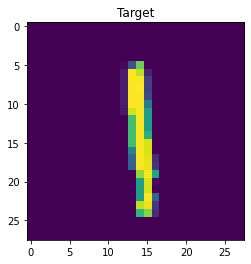

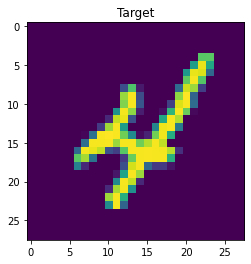

In [ ]:
#plotting the first 10 images from the training set
import matplotlib.pyplot as plt
for idx in range(10):
  img, target = training_data[idx]
  plt.imshow(img.squeeze())
  plt.title('Target')
  plt.show()

In [ ]:
#Loadinga data into the training and test loader so to apply in training algorithm and testing algorithm
train_loader = torch.utils.data.DataLoader(
  training_data,
  shuffle = True,
  batch_size = 16
)

test_loader = torch.utils.data.DataLoader(
    test_data,
    shuffle = True,
    batch_size = 16
)

In [ ]:
#Training the neural network we created above
import numpy as np

device = torch.device("cpu")
criteria = nn.CrossEntropyLoss()
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
losses = []

for idx, (imgs, targets) in enumerate(train_loader):
  imgs = imgs.to(device)
  targets = targets.to(device)
  outputs = model(imgs)
  
  loss = criteria(outputs, targets)
  losses.append(loss.item())
  loss.backward()

  optimizer.zero_grad()
  optimizer.step()


  # if(idx % 100==0):
  #   print(np.mean(losses))
  if idx % 1000 == 0:
    print(f"Loss: {np.mean(losses): 2f}")




Loss:  2.304807
Loss:  2.310022
Loss:  2.309715
Loss:  2.309793


In [ ]:
test_losses = []
correct=0
for idx, (imgs, targets) in enumerate(test_loader):
  imgs = imgs.to(device)
  targets = targets.to(device)
  outputs = model(imgs)

  test_loss = criteria(outputs, targets)
  test_losses.append(test_loss.item())

  #count correct values
  pred = outputs.argmax()
  correct += pred.eq(targets).sum()
  if(idx % 100 == 0):
    print(np.mean(test_losses))
print(correct)



2.3136301040649414
2.309468996406782
2.308477602194791
2.3093686476102304
2.30975217177089
2.309661890932186
2.3101561569334463
tensor(72)


In [ ]:
#HURRAYYYYYYYYYYYYYYYYYYYYY